In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# Importando as bibliotecas gerais:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Importando as bibliotecas Scikit Learn:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [46]:
# Definindo a quantidade de dados:
N = 10000

x0 = np.ones(4,)

# Features:
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])

# Adicionando ruído:
x1n = x1 + 0.1 * np.random.randn(4,)
x2n = x2 + 0.1 * np.random.randn(4,)
 
# Concateando as features:
x = np.c_[x0, x1, x2]
xn = np.c_[x0, x1n, x2n]

# tARGETS:
y = np.array([1, 0, 0, 1])

In [47]:
print(x1)
print(x2)
print(y)

[0 0 1 1]
[0 1 0 1]
[1 0 0 1]


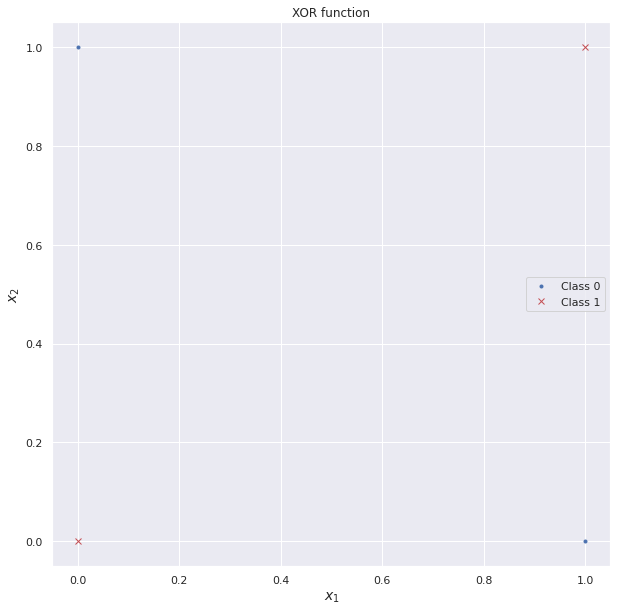

In [48]:
# Definindo os índices:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

# Plotando a figura:
fig = plt.figure(figsize=(10, 10))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('XOR function')
plt.legend()
plt.show()

In [54]:
# Instânciando o classificador:
MLP = MLPClassifier(solver='lbfgs',
                    activation='logistic', 
                    max_iter=10000,
                    random_state=20, 
                    hidden_layer_sizes=(3,))

# Treinando o classificador:
MLP.fit(x, y)

# Fazendo a predição:
y_pred = MLP.predict(xn)

In [74]:
parameter_space = {
    'hidden_layer_sizes': [(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15),(1,)],
    'random_state': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=2)
gs.fit(x, y) 

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(3,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=10000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...e=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'hidden_la

In [72]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'hidden_layer_sizes': (1,), 'random_state': 0}


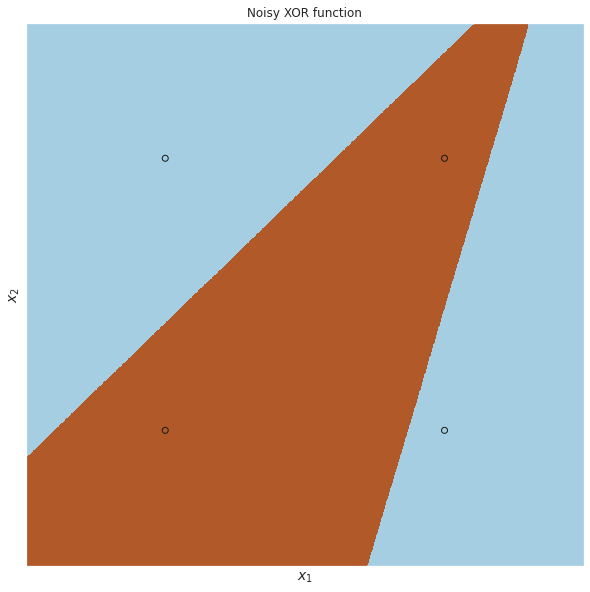

In [55]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = MLP.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy XOR function')
plt.show()

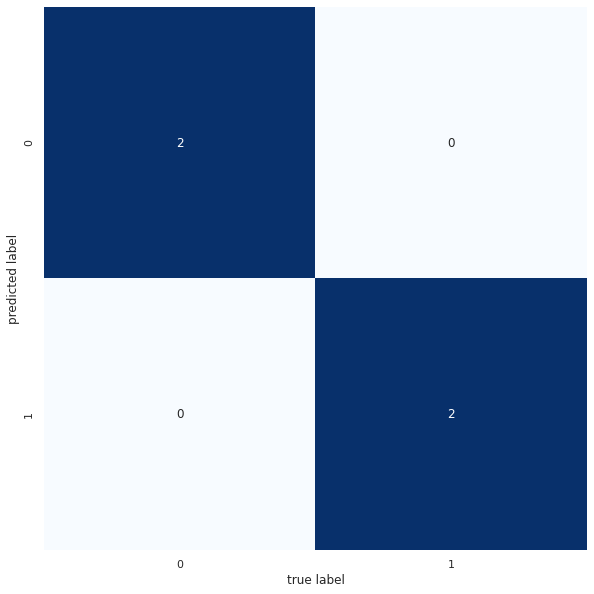

In [56]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(10, 10))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

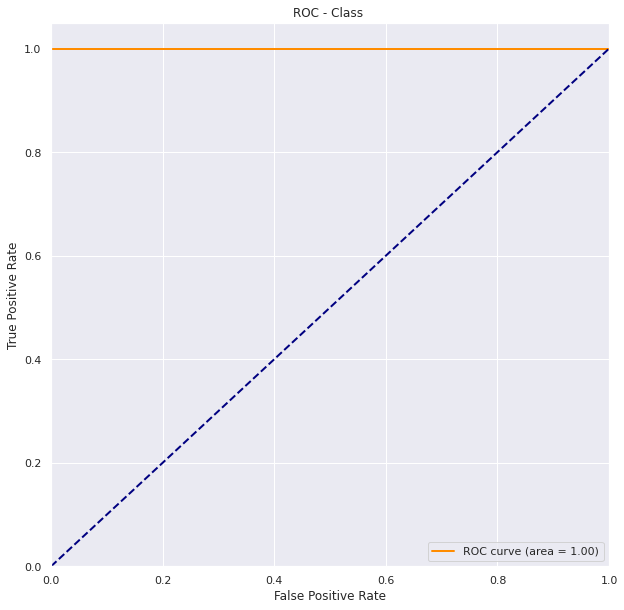

In [57]:
# Getting the probabilities for each class.
y_prob = MLP.predict_proba(xn)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))

fpr, tpr, _ = roc_curve(y, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.savefig('roc.png', dpi=600)
plt.show()

# **Resposta teórica**

A área sobre a curva indica que o algorítmo aprendeu com exíto as classes.